<a href="https://colab.research.google.com/github/gulabpatel/EDA_Libraries/blob/main/Dtreeviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Blog : https://towardsdatascience.com/a-better-way-to-visualize-decision-trees-with-the-dtreeviz-library-758994cdf05e

https://mljar.com/blog/visualize-tree-from-random-forest/

In [1]:
!pip install dtreeviz 
#!pip install graphviz      install graphviz if it is not installed

#Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from dtreeviz.trees import *
import graphviz

In [3]:
wine_white = pd.read_csv('/content/winequality-white.csv', sep=';', delimiter=';')
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_red = pd.read_csv('/content/winequality-red.csv', sep=';', delimiter=';')
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Visualizations**

Creating the features and target variables for ease.


In [6]:
features = wine_red.drop('quality',axis=1)
target = wine_red['quality']

#Regression decision tree


For the regression example, we’ll be predicting the quality of the wine.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


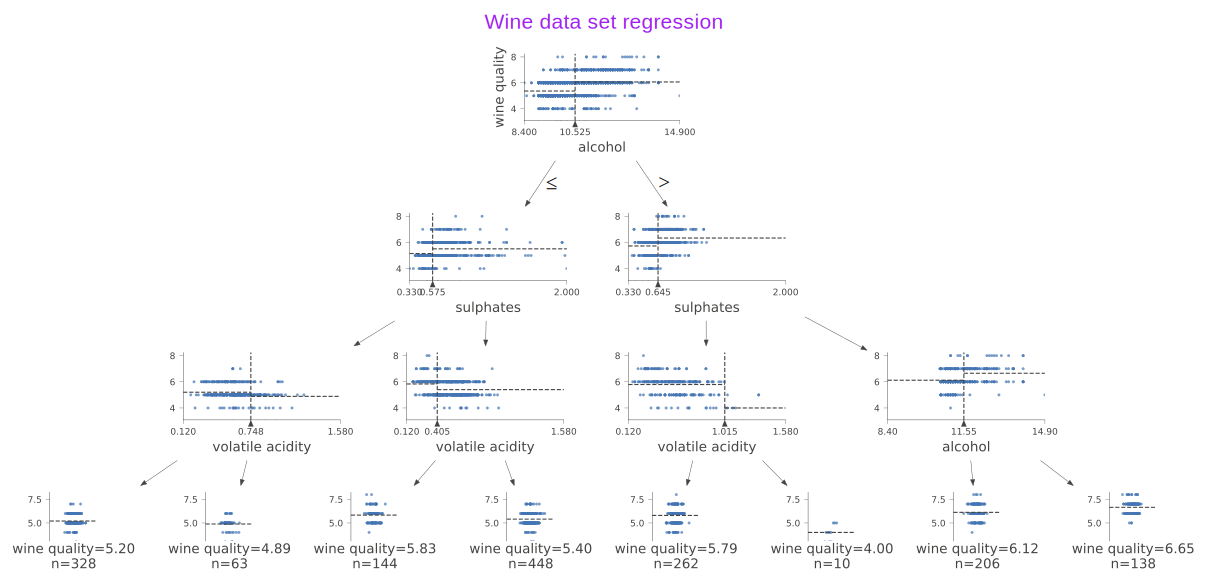

<Figure size 1800x1440 with 0 Axes>

In [7]:
# Regression tree on Wine data
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeRegressor(max_depth=3)  
regr.fit(features, target)
viz = dtreeviz(regr,
               features,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set regression",
               fontname="Arial",
               colors = {"title":"purple"},
               scale=1.5)
viz

#Classification decision tree

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


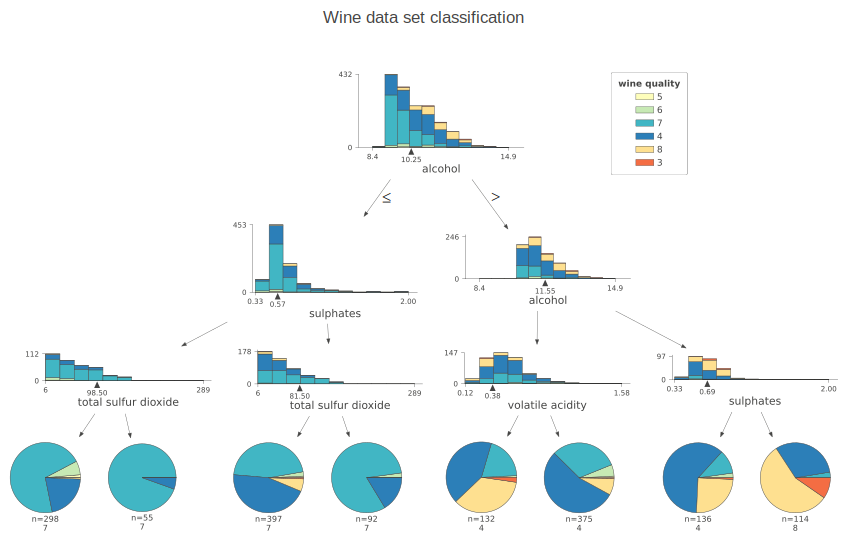

<Figure size 1800x1440 with 0 Axes>

In [8]:
# Classification tree on Wine data
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(features, target)
# pick random X observation for demo
#X = wine.data[np.random.randint(0, len(wine.data)),:]
viz = dtreeviz(clf,
               features,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set classification",
               class_names=['5', '6', '7', '4', '8', '3'],
               histtype='barstacked', # default 
               scale=1.2)
viz

#Customizations



**Scaling the image**

The scale parameter can be used to scale the overall image.

**Trees with a left to right alignment**

The orientation parameter can be set to LR to display the trees from left to right rather than top-down

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


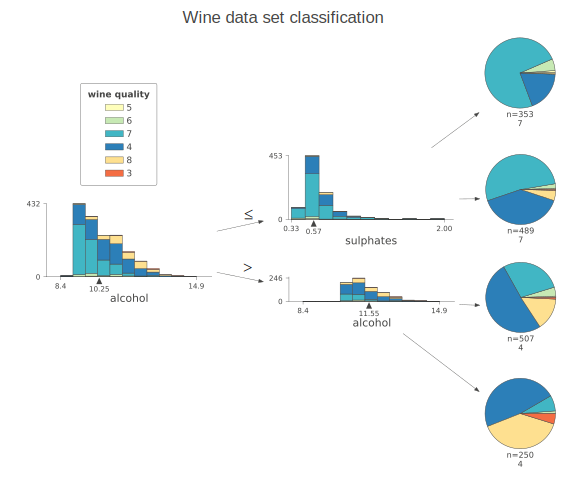

<Figure size 1800x1440 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(features, target)
# pick random X observation for demo
#X = wine.data[np.random.randint(0, len(wine.data)),:]
viz = dtreeviz(clf,
               features,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set classification",
               class_names=['5', '6', '7', '4', '8', '3'],
               orientation='LR', 
               scale=1.2)
viz

#Prediction path of a single observation

The library also helps to isolate and understand which decision path is followed by a specific test observation. This is very useful in explaining the prediction or the results to others. For instance, let’s pick out a random sample from the dataset and traverse its decision path.

In [10]:
X = features.iloc[np.random.randint(0, len(features)),:].values
X

array([ 9.1    ,  0.4    ,  0.57   ,  4.6    ,  0.08   ,  6.     ,
       20.     ,  0.99652,  3.28   ,  0.57   , 12.5    ])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


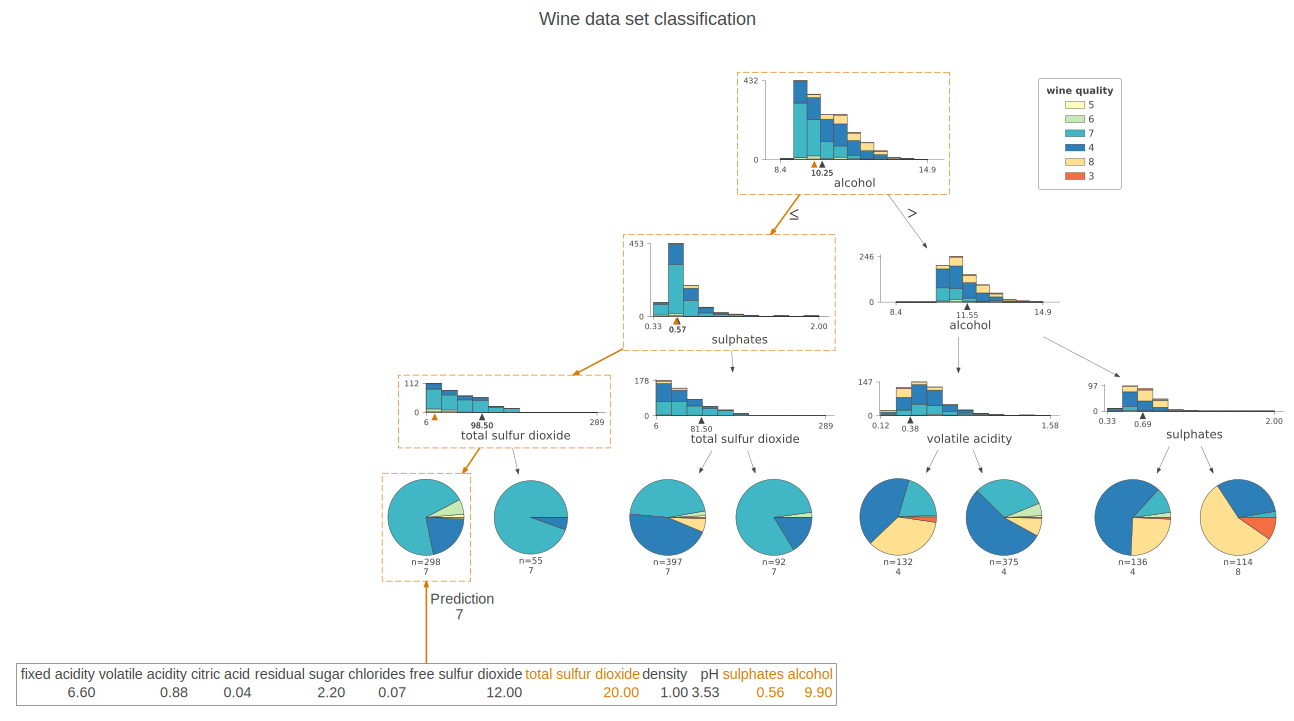

<Figure size 1800x1440 with 0 Axes>

In [11]:
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(features, target)
# pick random X observation for demo
X = features.iloc[np.random.randint(0, len(features)),:].values
viz = dtreeviz(clf,
               features,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set classification",
               class_names=['5', '6', '7', '4', '8', '3'],
               scale=1.3,
               X=X)
viz

#Saving the image
The output graph can be saved in an SVG format as follows:

In [12]:
viz.save_svg()

'/tmp/DTreeViz_519.svg'

--------------------------

#How to visualize a single Decision Tree from the Random Forest in Scikit-Learn (Python)

In [13]:
# Load packages
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [14]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [15]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
len(rf.estimators_)

100

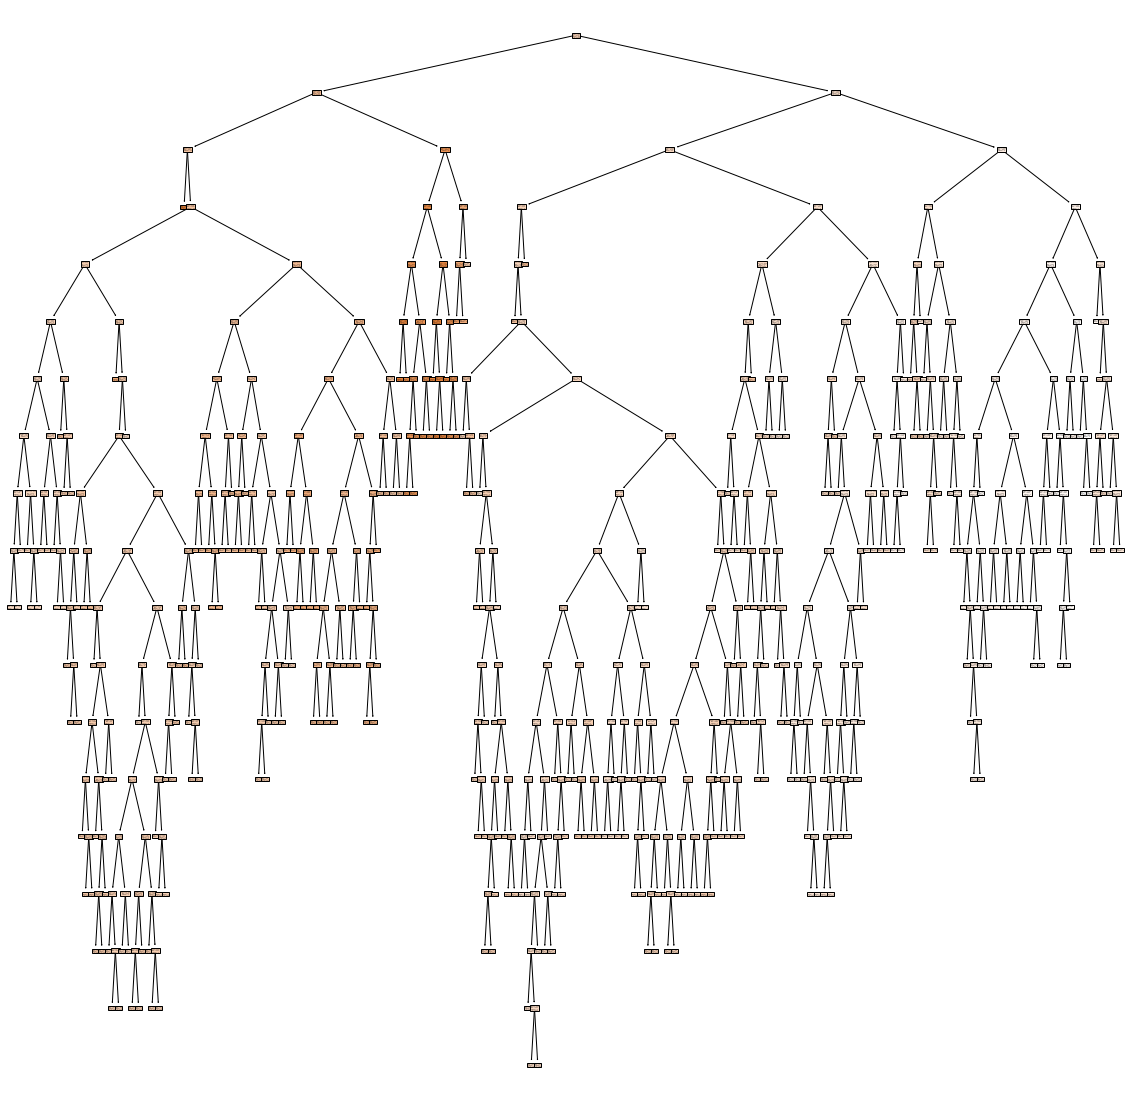

In [17]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

Do you understand anything? The tree is too large to visualize it in one figure and make it readable.

Let’s check the depth of the first tree from the Random Forest:

In [18]:
rf.estimators_[0].tree_.max_depth

18

Our first tree has max_depth=24. Other trees have similar depth. To make visualization readable it will be good to limit the depth of the tree. In MLJAR’s open-source AutoML package mljar-supervised the Decision Tree’s depth is set to be in range from 1 to 4. Let’s train the Random Forest again with max_depth=3.

In [19]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

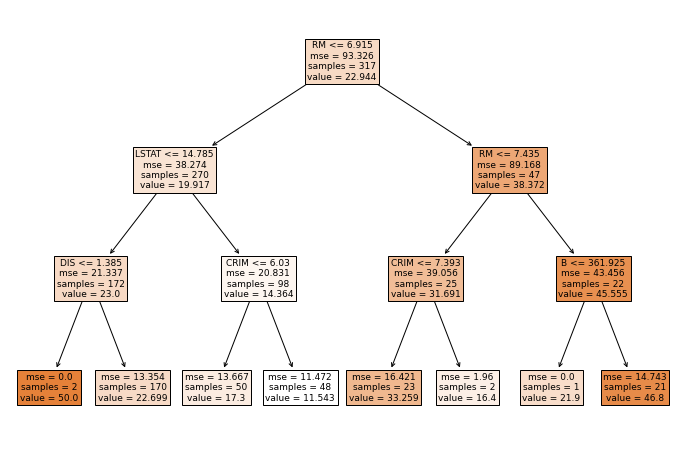

In [20]:
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

We can use dtreeviz package to visualize the first Decision Tree:

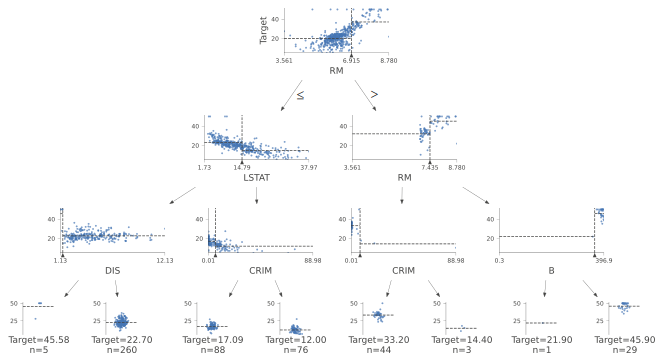

In [21]:
viz = dtreeviz(rf.estimators_[0], X, y, feature_names=X.columns, target_name="Target")
viz

-----------------------